# Iris 2: Das Iris-Dataset - Die Daten

Eines der beliebtesten einführenden Beispiele für den Einsatz von KI ist die Iris-DB. In dieser Datenbank (bzw. CSV-Datei) befinden sich 150 Datensätze, die durch Vermessung der Blätter dreier verschiedener Sorten (jeweils 50) von Iris-Pflanzen erstellt wurden, der 
* Iris setosa
* Iris virginica
* Iris versicolor

___

Vermessen wurden jeweils Länge und Breite des **Kronblatts (Petal)** und **Kelchblatts (Sepal)**.

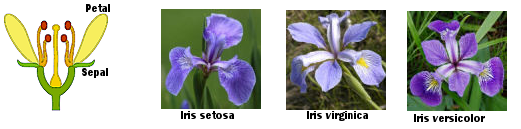
___

Die CSV-Datei besteht daher aus 150 Zeilen, wobei die ersten vier Einträge die Abmessungen der Blätter und der letzte Eintrag den Namen der Pflanze enthält.

Die Aufgabe besteht nun darin, aus den angebenen Werten der Sepal- und Petalblätter die Iris-Art zu bestimmen. Es geht also um eine Klassifikation, gesucht ist eine **Klassifizier** (*classifier*)

#### Mathematische Beschreibung

Codieren wir den Namen der Pflanzen durch die Ziffern 1, 2, 3, so erhalten wir eine Abbildung $F: \mathbb{R}^4 \rightarrow \{1,2,3\} \subset \mathbb{R}$. Unsere Parametermenge ist also vierdimensional, und die Werte liegen in der Menge {1,2,3}.


### Laden der Iris-Datenbank

In [3]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [1]:
def iris_ds():
    '''
    Liest das Iris Dataset ein
    '''    
    with open('daten/iris.csv', 'r') as file: 
        lines = file.read().splitlines()      
  
    rohdaten = np.array([line.split(',') for line in lines[1:]])
    x, y = rohdaten[:,:-1].astype(float),rohdaten[:,-1]
    return x,y

In [4]:
x,y = iris_ds()

### Visualisierung mit matplotlib

Sehen wir uns die Daten einmal genauer an. Da die Eingabedaten vierdimensional sind, tragen wir die Daten für Sepal und Petal getrennt auf.

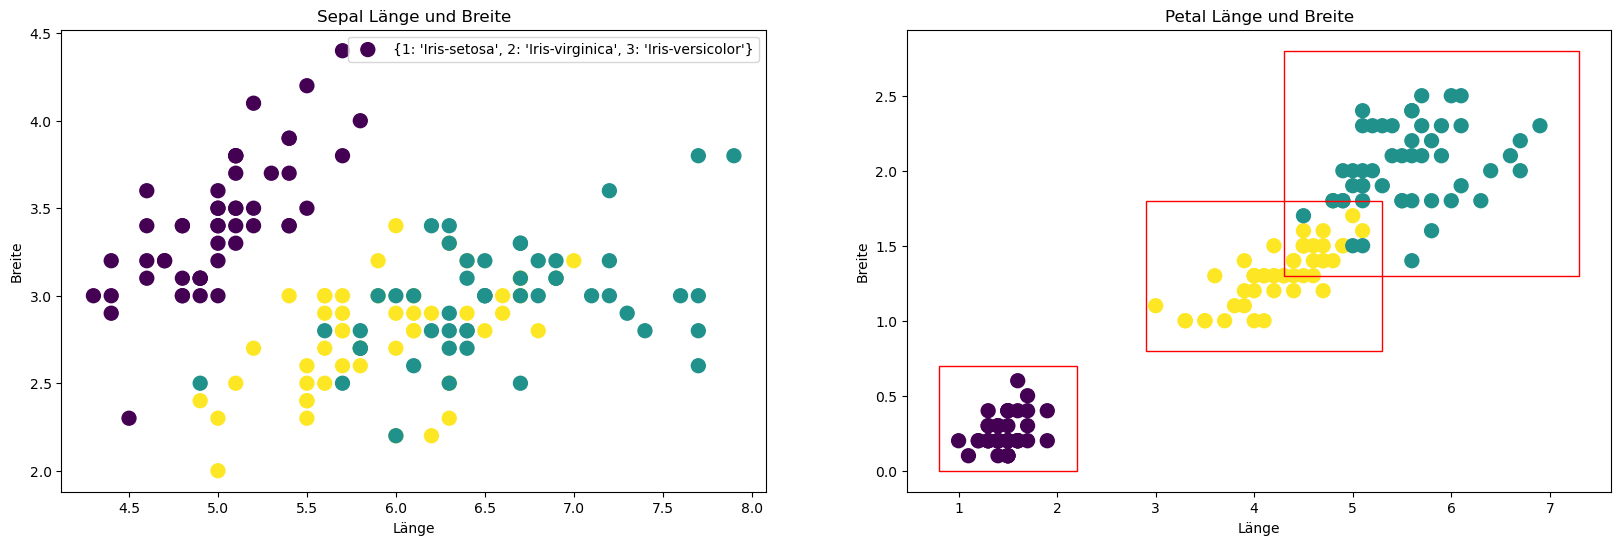

In [5]:
mapping = {'Iris-setosa':1,'Iris-virginica':2,'Iris-versicolor':3}
mapping_rev = {k:v for v,k in mapping.items()}
y_val = [mapping[y] for y in y]

plt.figure(figsize=(20, 6))

plt.subplot(121)    
plt.title('Sepal Länge und Breite')
plt.xlabel('Länge')
plt.ylabel('Breite')
plt.scatter(x[:, 0], x[:, 1], s=100, marker='o',c=y_val[:],label=mapping_rev)
plt.legend()

plt.subplot(122)  
plt.title('Petal Länge und Breite')
plt.xlabel('Länge')
plt.ylabel('Breite')
plt.scatter(x[:, 2], x[:, 3], s=100, marker='o',c=y_val[:])

# Im rechten Bild...
from matplotlib.patches import Rectangle
ax = plt.gca()
ax.add_patch(Rectangle((0.8, 0), 1.4,.7,  edgecolor='r', facecolor='none'))
ax.add_patch(Rectangle((2.9, 0.8), 2.4,1, edgecolor='r', facecolor='none'))
ax.add_patch(Rectangle((4.3, 1.3), 3,1.5, edgecolor='r', facecolor='none'))

plt.show()

Im rechten Bild zerfallen die Daten relativ deutlich in drei Bereiche. Die Daten der Iris setosa liegen völlig isoliert links unten, und die beiden anderen überlappen sich nur in einem kleinen Bereich. Wir können also relativ sicher Iris setosa anhand zweier Daten bestimmen. Im Überlappungsbereich von Iris virginica und Iris verticolor könnten wir mit Informationen aus den Sepal-Daten wahrscheinlich ebenfalls ein gute Wahl treffen; ansonsten wählt man zufällig. Implementieren wir einmal diese Lösung...

### Implementierung einer heuristischen Lösung

In [6]:
import random

def heuristisch(x):
    pl,pb = x[2],x[3]

    if pl < 2.5 and pb < 0.9:
        return 'Iris-setosa'
    
    if pl < 4.7 or pb < 1.3:
        return 'Iris-versicolor'  
    
    if pl > 4.7 or pb > 1.3:
        return 'Iris-virginica' 
    
    return 'Iris-virginica'  if random.random < 0.5 else 'Iris-versicolor'  


testresult = [heuristisch(x) == y for x,y in zip(x,y)]
print(f'Richtig: {np.count_nonzero(testresult)} von {len(testresult)} Datensätzen -> Genauigkeit = {100* (np.count_nonzero(testresult) / 150):0.1f}%')
    

Richtig: 139 von 150 Datensätzen -> Genauigkeit = 92.7%


### Diskussion

Wir haben also ohne große Mühe durch Betrachtung der Daten eine Funktion gefunden, die mit über 90 % Genauigkeit die richtige Pflanzenart bestimmt. Dabei haben wir sogar noch die Hälfte der verfügbaren Daten unbeachtet gelassen. Dies war allein durch die Visualisierung möglich. 

Der **Iris-Datensatz** gern als Beispiel für verschiedene Verfahren verwendet, etwa für **Clusterung durch K-Means**. 